In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install opencage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 4.0 MB 11.5 MB/s 


In [4]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
from opencage.geocoder import OpenCageGeocode
import folium
from folium.plugins import FastMarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/gdrive/MyDrive/COVIDcomp.csv", delimiter=',')
df_new=df
# Report the number of sentences.
print('Number of enteries: {:,}\n'.format(df_new.shape[0]))

# Display 10 random rows from the data.
df_new.head()

Number of enteries: 463



,S.NO,Institution,District,COVID BEDS Total,COVID BEDS Occupied,latitudes,longitudes
0,1,A.S Hospital,Ariyalur,30,29,11.112990,79.075330
1,2,Golden Hospital,Ariyalur,31,30,11.141042,79.075387
2,3,Annai Arul Hospital,Chengalpattu,40,40,12.921027,80.088149
3,4,Chennai Emergency care Centre Pammal,Chengalpattu,16,16,12.973690,80.131118
4,5,Dr. Rela Institute,Chengalpattu,160,160,12.956058,80.141067


In [7]:
def nans(df): return df[df.isnull().any(axis=1)]

In [8]:
nans(df_new)

,S.NO,Institution,District,COVID BEDS Total,COVID BEDS Occupied,latitudes,longitudes


In [10]:
dfn=df_new
covidsum=dfn['COVID BEDS Occupied'].sum()
avg=covidsum/463

In [ ]:
print(covidsum) #Total Covid Cases
print(avg) #Average no. of cases per hospital

21722
46.915766738660906


In [12]:
lat=dfn['latitudes'].to_list()
lon=dfn['longitudes'].to_list()

In [ ]:
m = folium.Map([11.41644605351662,78.73045144938763],tiles='OpenStreetMap',zoom_start=6)
locations = list(zip(dfn.latitudes, dfn.longitudes))
folium.plugins.MarkerCluster(locations=locations,                     
               popups=dfn['Institution'].tolist()).add_to(m)  
display(m)
#Map is displayed in images directory

In [ ]:
m= folium.Map(
    location=[11.41644605351662, 78.73045144938763],
    zoom_start=7.5,tiles='OpenStreetMap')
folium.LayerControl().add_to(m)

for row in dfn.iterrows():
    row=row[1]
    folium.CircleMarker(location=(row["latitudes"],
                                  row["longitudes"]),
                        radius= row['COVID BEDS Occupied']/avg,
                        color="#FF0000",
                        popup=row['Institution'],
                        fill=True).add_to(m)

display(m)
#Map is displayed in images directory

ELBOW METHOD

In [15]:
sse = []
k_rng = range(25,100)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfn[['latitudes','longitudes']])
    sse.append(km.inertia_)

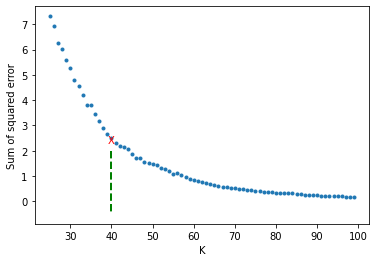

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.scatter(k_rng,sse,marker = '.' )
plt.annotate("X", (39, 2.3),color = 'r' )
plt.plot([40,40],[2,-0.5],color='green', linestyle='dashed', linewidth=2)

SILHOUETTE ANALYSIS

In [17]:
from sklearn.metrics import silhouette_score
range_n_clusters=[]
for i in range(25,100):
  range_n_clusters.append(i)


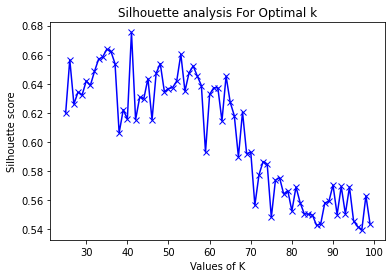

In [31]:
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(dfn[['latitudes','longitudes']])
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(dfn[['latitudes','longitudes']], cluster_labels))
 if(silhouette_score(dfn[['latitudes','longitudes']], cluster_labels)>m1):
   m1=silhouette_score(dfn[['latitudes','longitudes']], cluster_labels)
   m2=cluster_labels
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [32]:
km = KMeans(n_clusters=40)
y_predicted = km.fit_predict(dfn[['latitudes','longitudes']])

In [33]:
dfn['cluster']=y_predicted
dfn

,S.NO,Institution,District,COVID BEDS Total,COVID BEDS Occupied,latitudes,longitudes,cluster
0,1,A.S Hospital,Ariyalur,30,29,11.112990,79.075330,4
1,2,Golden Hospital,Ariyalur,31,30,11.141042,79.075387,4
2,3,Annai Arul Hospital,Chengalpattu,40,40,12.921027,80.088149,25
3,4,Chennai Emergency care Centre Pammal,Chengalpattu,16,16,12.973690,80.131118,25
4,5,Dr. Rela Institute,Chengalpattu,160,160,12.956058,80.141067,25
...,...,...,...,...,...,...,...,...
458,459,"Trustlife Medical Centre, Panaiyur",Chennai,20,16,12.889022,80.246462,25
459,460,"Vasantha Hospital, Thiruvottiyur",Chennai,10,9,13.173934,80.294032,1
460,461,"Vijayakumar Hospital,Swamiyarmadam",Kanyakumari,22,22,8.287601,77.269206,2
461,462,"Singhvi Health Center, Mint Street",Chennai,15,15,13.093720,80.279634,1


In [35]:
centroids=km.cluster_centers_.tolist()

In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
addr=[]
for i in range(len(centroids)):
  s=str(centroids[i][0])+ ','+str(centroids[i][1])
  location = geolocator.reverse(s)
  addr.append(location.address)

OPTIMAL LOCATION OF VACCINATION CENTERS ARE REPRESENTED BY GREEN MARKERS

In [40]:
icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html: '<center><b>'+cluster.getChildCount()+'</b></center>',
    className:'marker-cluster marker-cluster-large',
    iconSize:new L.Point(35, 35)
    });
}"""

In [ ]:
m3 = folium.Map([11.41644605351662,78.73045144938763],tiles='OpenStreetMap',zoom_start=6)
locations = list(zip(dfn.latitudes, dfn.longitudes))
folium.plugins.MarkerCluster(locations=locations,                     
               popups=dfn['Institution'].tolist(),icon_create_function=icon_create_function).add_to(m3)
for i in range(len(centroids)):
    folium.Marker(centroids[i], popup = addr[i], icon=folium.Icon(color='green', icon_color='white', icon='plus')).add_to(m3)
display(m3)
#Map is displayed in images directory

In [ ]:
m2= folium.Map(
    location=[11.41644605351662, 78.73045144938763],
    zoom_start=9,tiles='OpenStreetMap')
folium.LayerControl().add_to(m2)
for row in dfn.iterrows():
    row=row[1]
    folium.CircleMarker(location=(row["latitudes"],
                                  row["longitudes"]),
                        radius= 2*row['COVID BEDS Occupied']/avg,
                        color="#FF0000",
                        popup=row['Institution'],
                        fill=True).add_to(m2)
for i in range(len(centroids)):
    folium.Marker(centroids[i], popup = addr[i], icon=folium.Icon(color='green', icon_color='white', icon='plus')).add_to(m2)
    
folium.LayerControl().add_to(m2)
m2
#Map is displayed in images directory